In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('random subset of data files/responses.csv')

/var/folders/qq/qm2zshms6rl57mb9s95rh3xc0000gn/T/ipykernel_18501/1876141887.py:1: DtypeWarning: Columns (33,34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('random subset of data files/responses.csv')


In [3]:
df_full = pd.read_csv('Data files/responses.csv')

/var/folders/qq/qm2zshms6rl57mb9s95rh3xc0000gn/T/ipykernel_18501/3800257269.py:1: DtypeWarning: Columns (32,33,34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv('Data files/responses.csv')


In [4]:
df_full.size

63410960

In [26]:
df_0_10000 = df_full.iloc[0:10000]

### Create df with chapter_number, student_id, num_passed DF ###




In [6]:
#for a specific chapter and section and student
code = df_full[df_full['item_type'] == 'code']

code_1_5 = code
#code_1_5 = code[ (code['chapter_number'] == 1.0) & (code['section_number'] == 5.0) ]

s_c_1_5 = code_1_5
#s_c_1_5 = code_1_5[ (code_1_5['student_id'] == '83df1b22-c83a-4412-8e27-1c113bd17907') | (code_1_5['student_id'] == '36ada86d-1a6d-4f4a-8d11-3b0ccebf4c11')]
#s_c_1_5

In [7]:
#create df with only columns needed
cleaned_SC15 = s_c_1_5[['student_id', 'chapter_number', 'item_id', 'response', 'prompt', 'points_possible', 'points_earned', 'dt_submitted', 'attempt']]
#cleaned_SC15

In [8]:
# does number of CQs passed predict success on EOCs?
numPassed = cleaned_SC15.groupby('item_id')['points_earned'].any(1.0).count()

In [9]:
#dictionary {userid: numPassed, 

# Assuming 'cleaned_SC15' is your DataFrame and it includes a 'user_id' column.

# First, create a column that flags if the points_earned is 1.0 for any row within each item_id group
cleaned_SC15['passed'] = cleaned_SC15.groupby('item_id')['points_earned'].transform(lambda x: (x == 1.0).any())
cleaned_SC15

num_passed_by_user_chapter = (
    cleaned_SC15[cleaned_SC15['passed']]
    .groupby(['student_id', 'chapter_number'])['item_id']
    .nunique()
    .reset_index(name='num_passed')
)
print(num_passed_by_user_chapter)

                                 student_id  chapter_number  num_passed
0      001824fb-a2fd-431d-aef6-7a1250d97a62             1.0          24
1      001824fb-a2fd-431d-aef6-7a1250d97a62             2.0          26
2      001824fb-a2fd-431d-aef6-7a1250d97a62             3.0          29
3      001824fb-a2fd-431d-aef6-7a1250d97a62             4.0          19
4      001824fb-a2fd-431d-aef6-7a1250d97a62             5.0          12
...                                     ...             ...         ...
15927  ff6ec9fe-de1d-4b45-8136-59465d9c85ab            12.0          14
15928  ff6ec9fe-de1d-4b45-8136-59465d9c85ab            13.0          11
15929  ff6ec9fe-de1d-4b45-8136-59465d9c85ab            14.0          16
15930  ff6ec9fe-de1d-4b45-8136-59465d9c85ab            15.0           6
15931  ff6ec9fe-de1d-4b45-8136-59465d9c85ab            16.0           8

[15932 rows x 3 columns]


/var/folders/qq/qm2zshms6rl57mb9s95rh3xc0000gn/T/ipykernel_18501/562977077.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_SC15['passed'] = cleaned_SC15.groupby('item_id')['points_earned'].transform(lambda x: (x == 1.0).any())


### Pull EOC Data

In [10]:
checkpoints = pd.read_csv('random subset of data files/checkpoints.csv')

In [28]:
checkpoints_full = pd.read_csv('Data files/checkpoints.csv')

In [12]:
checkpoints_full.size
checkpoints_0_10000 = checkpoints_full.iloc[0:10000]

In [13]:
#we now have [student_id : num_codechunks_passed]
#create [student_id : score_checkpoint]
f_cp = checkpoints_full.dropna(subset=['EOC'])
f_cp_needed = f_cp[['chapter_number', 'student_id', 'EOC']]
f_cp_needed['chapter_number'] = f_cp_needed['chapter_number'].astype(float)

f_cp_needed = f_cp_needed.drop_duplicates()
f_cp_needed
#f_cp_needed[ f_cp_needed['student_id' == '03fefe56-a52f-49fe-9cd8-b183e9badc58'] ] 

/var/folders/qq/qm2zshms6rl57mb9s95rh3xc0000gn/T/ipykernel_18501/237249873.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_cp_needed['chapter_number'] = f_cp_needed['chapter_number'].astype(float)


,chapter_number,student_id,EOC
3,2.0,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,0.514563
4,3.0,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,0.642857
6,5.0,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,0.436620
7,6.0,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,0.600000
9,8.0,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,0.524390
...,...,...,...
79087,16.0,ff55bab4-812b-405b-9856-8bedf9fb11f9,1.000000
79088,1.0,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,0.897436
79089,14.0,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,0.517857
79090,15.0,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,0.272727


### Merge Data (Num_Passed and EOC) ###

In [14]:
#merge datasets f_cp_needed and num_passed_by_user_chapter
merged_df_NP_EOC = pd.merge(num_passed_by_user_chapter, f_cp_needed, on=['student_id', 'chapter_number'], how='inner')
merged_df_NP_EOC 

,student_id,chapter_number,num_passed,EOC
0,001824fb-a2fd-431d-aef6-7a1250d97a62,1.0,24,0.921053
1,001824fb-a2fd-431d-aef6-7a1250d97a62,2.0,26,0.839080
2,001824fb-a2fd-431d-aef6-7a1250d97a62,3.0,29,0.769231
3,001824fb-a2fd-431d-aef6-7a1250d97a62,4.0,19,0.743590
4,001824fb-a2fd-431d-aef6-7a1250d97a62,5.0,12,0.777778
...,...,...,...,...
15982,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,12.0,14,0.531646
15983,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,13.0,11,0.677419
15984,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,14.0,16,0.517857
15985,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,15.0,6,0.272727


### Load in data (engaged) ###

In [15]:
page_views = pd.read_csv('random subset of data files/page_views.csv')

In [16]:
page_views_full = pd.read_csv('Data files/page_views.csv')

/var/folders/qq/qm2zshms6rl57mb9s95rh3xc0000gn/T/ipykernel_18501/2926529880.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  page_views_full = pd.read_csv('Data files/page_views.csv')


In [17]:
pv_imp = page_views_full[['student_id', 'chapter_number', 'section_number', 'engaged']]
#print(pv_imp[  (pv_imp['student_id'] == "988aaef5-55d8-4efd-a2aa-8a17e687965e") & (pv_imp['chapter_number'] == 1.0) & (pv_imp['section_number'] == 3.0)  ])

In [18]:
grouped_pv_imp = pv_imp.groupby(['student_id', 'chapter_number'])['engaged'].sum().reset_index()
grouped_pv_imp

,student_id,chapter_number,engaged
0,001824fb-a2fd-431d-aef6-7a1250d97a62,1.0,5663330.0
1,001824fb-a2fd-431d-aef6-7a1250d97a62,2.0,30902762.0
2,001824fb-a2fd-431d-aef6-7a1250d97a62,3.0,34127489.0
3,001824fb-a2fd-431d-aef6-7a1250d97a62,4.0,18987025.0
4,001824fb-a2fd-431d-aef6-7a1250d97a62,5.0,15971898.0
...,...,...,...
16358,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,12.0,7870316.0
16359,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,13.0,7140619.0
16360,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,14.0,7802712.0
16361,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,15.0,1384577.0


### Merge num_passed_EOC with engaged ####

In [19]:
merged_df_NP_EOC_Engaged = pd.merge(merged_df_NP_EOC, grouped_pv_imp, on=['student_id', 'chapter_number'], how='inner')
merged_df_NP_EOC_Engaged

,student_id,chapter_number,num_passed,EOC,engaged
0,001824fb-a2fd-431d-aef6-7a1250d97a62,1.0,24,0.921053,5663330.0
1,001824fb-a2fd-431d-aef6-7a1250d97a62,2.0,26,0.839080,30902762.0
2,001824fb-a2fd-431d-aef6-7a1250d97a62,3.0,29,0.769231,34127489.0
3,001824fb-a2fd-431d-aef6-7a1250d97a62,4.0,19,0.743590,18987025.0
4,001824fb-a2fd-431d-aef6-7a1250d97a62,5.0,12,0.777778,15971898.0
...,...,...,...,...,...
15982,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,12.0,14,0.531646,7870316.0
15983,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,13.0,11,0.677419,7140619.0
15984,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,14.0,16,0.517857,7802712.0
15985,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,15.0,6,0.272727,1384577.0


### Import length ###

In [20]:
length_summaries = pd.read_csv('random subset of data files/length_series.csv')
length_summaries

,student_id,chapter_number,length
0,001824fb-a2fd-431d-aef6-7a1250d97a62,1.0,131
1,001824fb-a2fd-431d-aef6-7a1250d97a62,2.0,91
2,001824fb-a2fd-431d-aef6-7a1250d97a62,3.0,65
3,001824fb-a2fd-431d-aef6-7a1250d97a62,5.0,71
4,001824fb-a2fd-431d-aef6-7a1250d97a62,6.0,73
...,...,...,...
9228,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,6.0,56
9229,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,9.0,91
9230,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,10.0,40
9231,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,11.0,54


### Merge numPassed_EOC_engaged with length

In [21]:
merged_df_NP_EOC_Engaged_Length = pd.merge(merged_df_NP_EOC_Engaged, length_summaries, on=['student_id', 'chapter_number'], how='inner')
merged_df_NP_EOC_Engaged_Length

,student_id,chapter_number,num_passed,EOC,engaged,length
0,001824fb-a2fd-431d-aef6-7a1250d97a62,1.0,24,0.921053,5663330.0,131
1,001824fb-a2fd-431d-aef6-7a1250d97a62,2.0,26,0.839080,30902762.0,91
2,001824fb-a2fd-431d-aef6-7a1250d97a62,3.0,29,0.769231,34127489.0,65
3,001824fb-a2fd-431d-aef6-7a1250d97a62,5.0,12,0.777778,15971898.0,71
4,001824fb-a2fd-431d-aef6-7a1250d97a62,6.0,19,0.697917,17611781.0,73
...,...,...,...,...,...,...
9234,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,6.0,19,0.500000,16650582.0,56
9235,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,9.0,13,0.611650,14206097.0,91
9236,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,10.0,12,0.469697,8793743.0,40
9237,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,11.0,16,0.518519,10646661.0,54


### Create File Path for CSV save ###

In [22]:
import os
subfolder = 'random subset of data files'
#filename = 'NP_ENG_EOC.csv'
filename = 'NP_ENG_EOC_FULL.csv'
filepath = os.path.join(subfolder, filename)
merged_df_NP_EOC_Engaged_Length.to_csv(filepath)

### Create Data Visualization of EOC vs num_code_chunks_passed For all Students and All Chapters

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


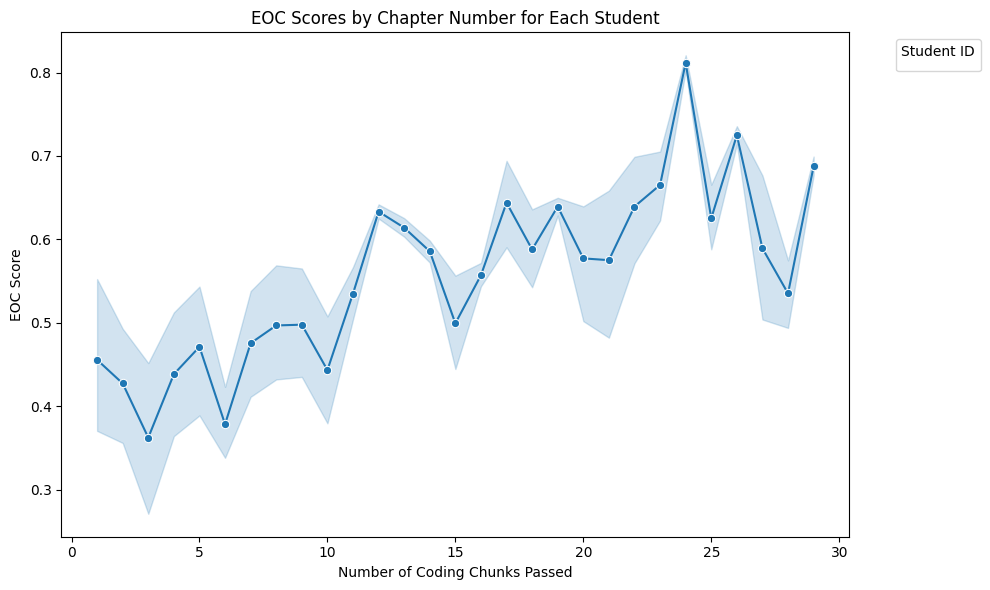

In [23]:
# Now, we'll create the plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_df_NP_EOC_Engaged_Length, x='num_passed', y='EOC', marker='o')

plt.title('EOC Scores by Chapter Number for Each Student')
plt.xlabel('Number of Coding Chunks Passed')
plt.ylabel('EOC Score')
plt.legend(title='Student ID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()